In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,StandardScaler, MinMaxScaler, RobustScaler,OrdinalEncoder, LabelEncoder, FunctionTransformer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,...,5,3,6,5,0,0,0,0,0,0


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
birth_year,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
education_level,2199,5,Graduation,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,2173.0,NaN,NaN,NaN,52266.031293,25274.007394,1730.0,35196.0,51411.0,68487.0,666666.0
num_children,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
num_teenagers,2196.0,NaN,NaN,NaN,0.506375,0.54372,0.0,0.0,0.0,1.0,2.0
signup_date,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_since_last_purchase,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
has_recent_complaint,2240.0,NaN,NaN,NaN,0.009375,0.096391,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2240 non-null   int64  
 1   birth_year                2240 non-null   int64  
 2   education_level           2199 non-null   object 
 3   marital_status            2240 non-null   object 
 4   annual_income             2173 non-null   float64
 5   num_children              2240 non-null   int64  
 6   num_teenagers             2196 non-null   float64
 7   signup_date               2240 non-null   object 
 8   days_since_last_purchase  2240 non-null   int64  
 9   has_recent_complaint      2240 non-null   int64  
 10  spend_wine                2240 non-null   int64  
 11  spend_fruits              2240 non-null   int64  
 12  spend_meat                2240 non-null   int64  
 13  spend_fish                2240 non-null   int64  
 14  spend_sw

In [ ]:
df.shape

(2240, 27)

In [ ]:
df.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [ ]:
df.drop('customer_id', axis=1, inplace=True)

In [ ]:
df['signup_date'] = pd.to_datetime(df['signup_date'], format='mixed', dayfirst=True)

In [ ]:
def fetuere_engineering(df) :
   df = df.copy()
   current_year = datetime.now().year
   df['age'] = current_year - df['birth_year']
   df.loc[df['age'] > 100, 'age'] = np.nan
   spend_cols = [c for c in df.columns if c.startswith('spend_')]
   if len(spend_cols) > 0:
        df['total_spend'] = df[spend_cols].sum(axis=1)
   accepted_campaign=[c for c in df.columns if c.startswith('accepted_campaign_')]
   df['num_accepted_campaigns'] = df[accepted_campaign].sum(axis=1) if len(accepted_campaign)>0 else np.nan
   purchase_cols = [c for c in df.columns if c.startswith('num_') and 'visits' not in c]
   df['total_purchases'] = df[purchase_cols].sum(axis=1) if len(purchase_cols)>0 else np.nan
   if 'num_web_purchases' in df.columns and 'total_purchases' in df.columns:
        df['online_ratio'] = df['num_web_purchases'] / (df['total_purchases'].replace(0, np.nan))
   return df



In [ ]:
df = fetuere_engineering(df)

In [ ]:
df.drop(['accepted_campaign_5', 'accepted_campaign_4', 'accepted_campaign_3', 'accepted_campaign_2', 'accepted_campaign_1'], axis=1, inplace=True)

In [ ]:
df.head(7).T

,0,1,2,3,4,5,6
birth_year,1957,1954,1965,1984,1981,1967,1971
education_level,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation
marital_status,Single,Single,Together,Together,Married,Together,Divorced
annual_income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0
num_children,0,1,0,1,1,0,0
num_teenagers,0.0,1.0,0.0,0.0,0.0,1.0,1.0
signup_date,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00
days_since_last_purchase,58,38,26,26,94,16,34
has_recent_complaint,0,0,0,0,0,0,0
spend_wine,635,11,426,11,173,520,235


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

birth_year                  0
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
signup_date                 0
days_since_last_purchase    0
has_recent_complaint        0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases      0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
web_visits_last_month       0
accepted_last_campaign      0
age                         0
total_spend                 0
num_accepted_campaigns      0
total_purchases             0
online_ratio                0
dtype: int64

In [ ]:
df.drop('birth_year',axis=1,inplace=True)

In [ ]:
numeric_feature = df.select_dtypes(include=[np.number]).columns.tolist()

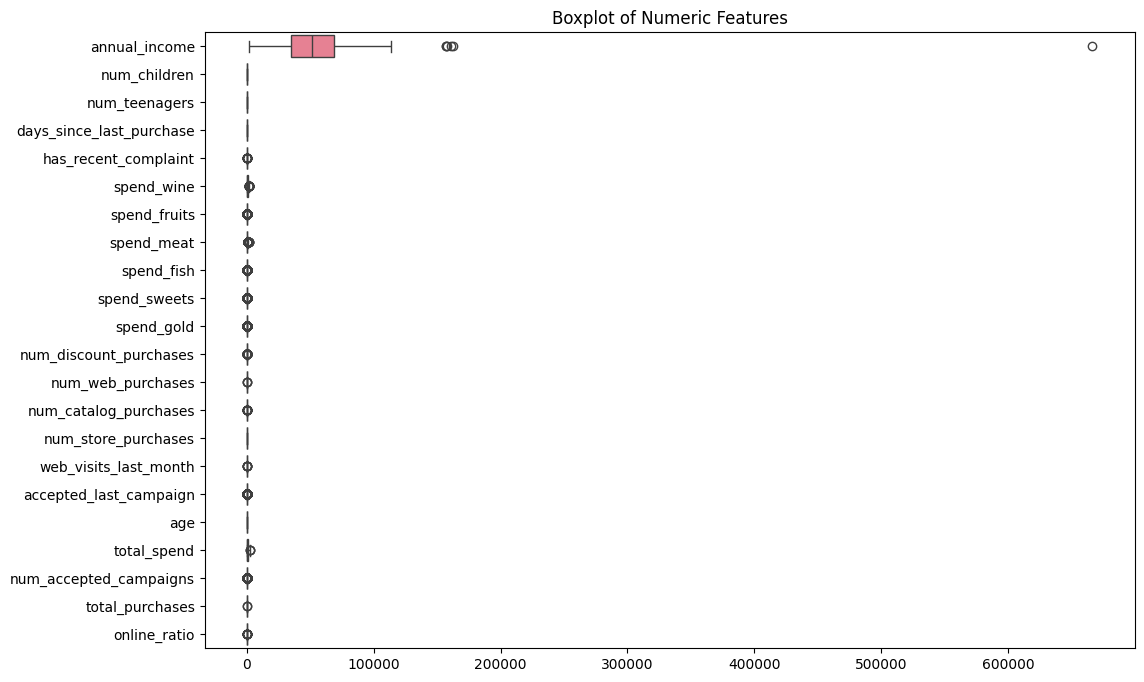

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_feature], orient='h')
plt.title('Boxplot of Numeric Features')
plt.show()

In [ ]:
X_outlier=df[['annual_income','total_spend','total_purchases','online_ratio']]
Q1 = X_outlier.quantile(0.25)
Q3 = X_outlier.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X_outlier['annual_income'] < (Q1['annual_income'] - 1.5 * IQR['annual_income'])) | (X_outlier['annual_income'] > (Q3['annual_income'] + 1.5 * IQR['annual_income'])))
X_outlier[outliers]
outliers.sum()

6

In [ ]:
df = df.loc[~outliers].reset_index(drop=True)

In [ ]:
df.shape

(2078, 25)

In [ ]:
df[numeric_feature].corr()

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_last_campaign,age,total_spend,num_accepted_campaigns,total_purchases,online_ratio
annual_income,1.000000,-0.534788,0.050097,0.006759,-0.032619,0.729352,0.531218,0.703265,0.551307,0.554989,...,0.502614,0.709604,0.687366,-0.646361,0.177190,0.217905,0.823724,0.394815,0.699078,0.117519
num_children,-0.534788,1.000000,-0.050019,0.016681,0.043415,-0.500507,-0.377105,-0.447119,-0.391899,-0.378803,...,-0.379415,-0.519459,-0.509006,0.446199,-0.080409,-0.245406,-0.560507,-0.214138,-0.440559,-0.196948
num_teenagers,0.050097,-0.050019,1.000000,0.012377,0.013022,0.002919,-0.167295,-0.262909,-0.200528,-0.163339,...,0.171468,-0.116844,0.055290,0.126557,-0.158867,0.364202,-0.135784,-0.132548,0.193484,0.002075
days_since_last_purchase,0.006759,0.016681,0.012377,1.000000,-0.001273,0.011839,-0.002994,0.022560,0.001913,0.025666,...,0.000902,0.024056,-0.000741,-0.013310,-0.213381,0.011466,0.017771,-0.013974,0.011355,-0.006686
has_recent_complaint,-0.032619,0.043415,0.013022,-0.001273,1.000000,-0.040617,-0.004948,-0.027230,-0.017881,-0.019827,...,-0.012870,-0.027681,-0.024761,0.029004,0.001952,0.009179,-0.038570,-0.019669,-0.021071,-0.005288
spend_wine,0.729352,-0.500507,0.002919,0.011839,-0.040617,1.000000,0.378374,0.590657,0.393718,0.388588,...,0.553522,0.669507,0.638761,-0.326325,0.243797,0.166179,0.896872,0.512664,0.726384,0.151001
spend_fruits,0.531218,-0.377105,-0.167295,-0.002994,-0.004948,0.378374,1.000000,0.566713,0.596279,0.574280,...,0.302235,0.508498,0.459362,-0.425715,0.118502,0.013328,0.611116,0.155567,0.433389,0.068873
spend_meat,0.703265,-0.447119,-0.262909,0.022560,-0.027230,0.590657,0.566713,1.000000,0.591972,0.553450,...,0.328909,0.719819,0.513641,-0.548651,0.252974,0.041108,0.855797,0.324986,0.537852,0.031101
spend_fish,0.551307,-0.391899,-0.200528,0.001913,-0.017881,0.393718,0.596279,0.591972,1.000000,0.578744,...,0.294650,0.563522,0.457772,-0.456908,0.108741,0.039525,0.641649,0.180260,0.445571,0.049764
spend_sweets,0.554989,-0.378803,-0.163339,0.025666,-0.019827,0.388588,0.574280,0.553450,0.578744,1.000000,...,0.332499,0.525559,0.451004,-0.426716,0.121291,0.024600,0.608618,0.208682,0.454082,0.092960


Text(0.5, 1.0, 'Correlation Matrix')

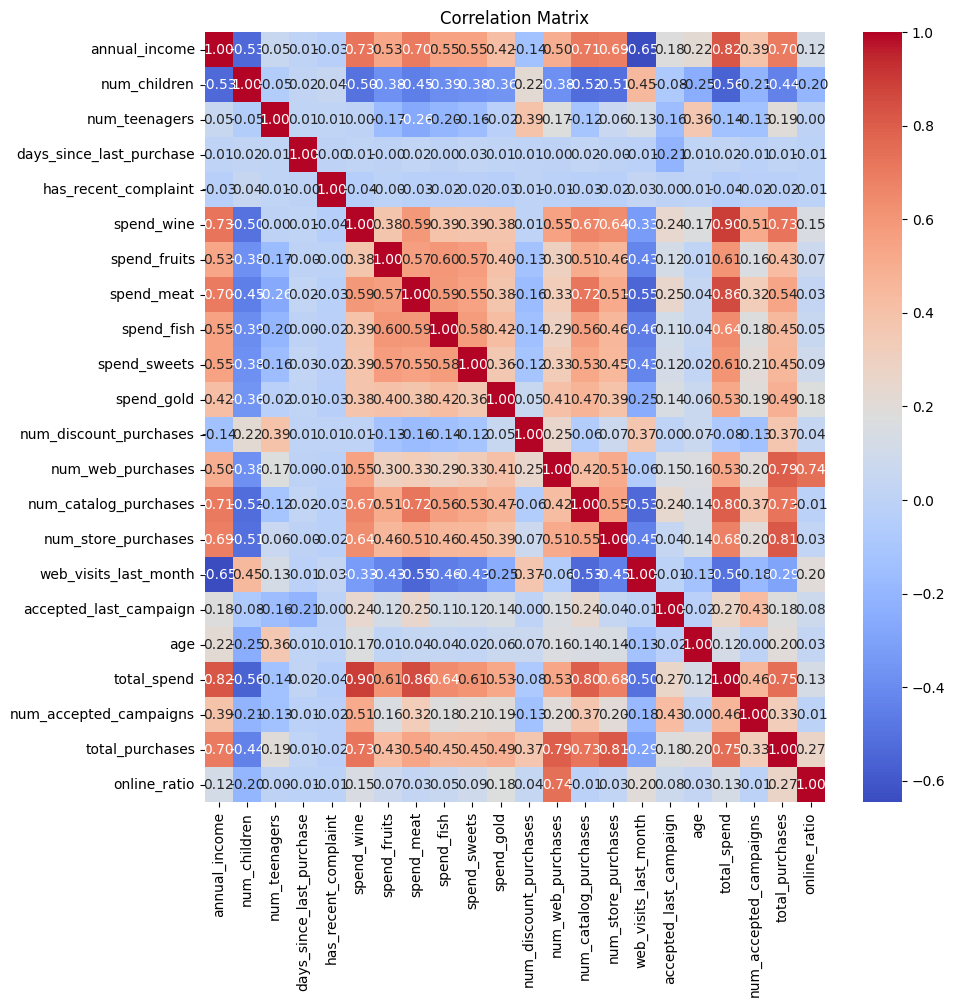

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_feature].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

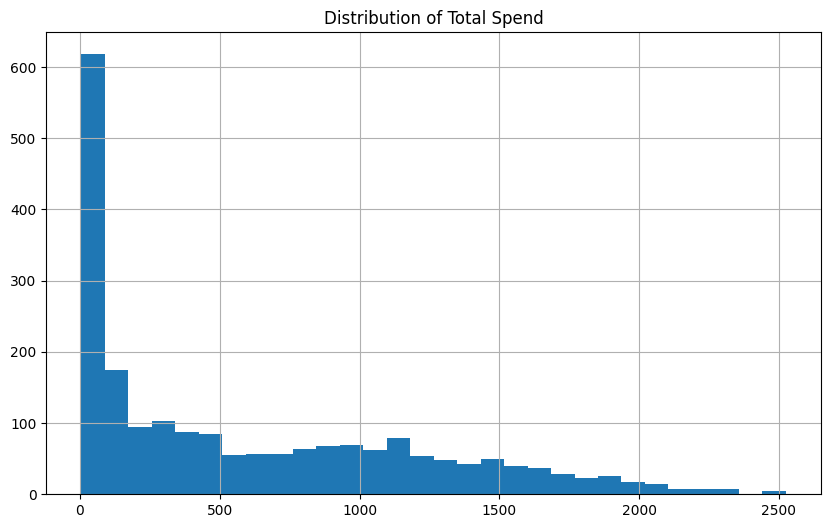

In [ ]:
df['total_spend'].hist(bins=30, figsize=(10,6))
plt.title('Distribution of Total Spend')
plt.show()

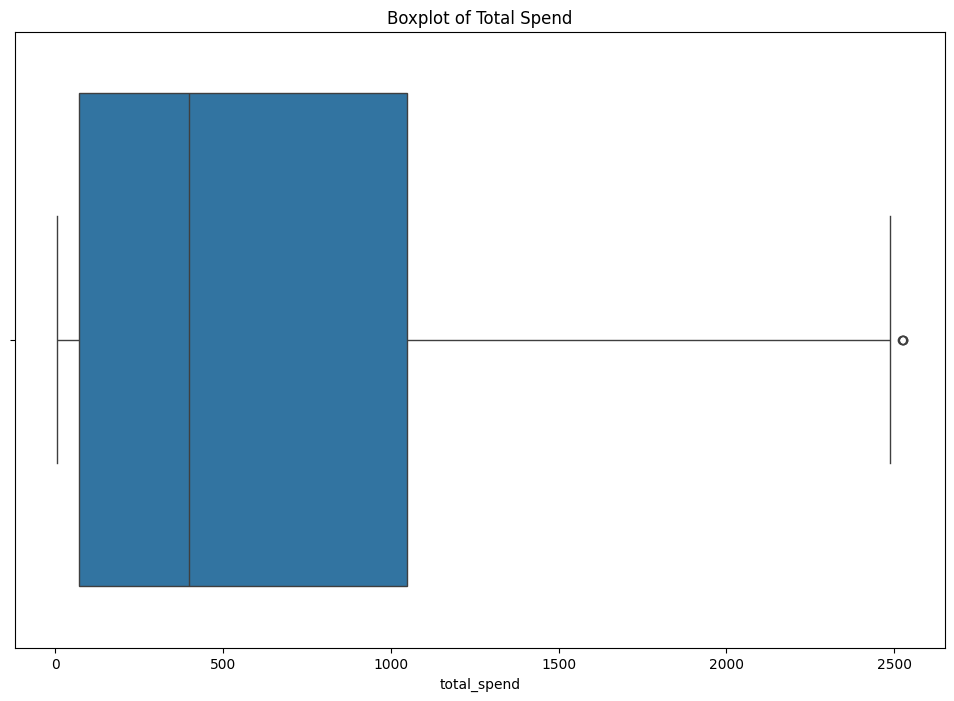

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['total_spend'], orient='h')
plt.title('Boxplot of Total Spend')
plt.show()

In [ ]:
df[numeric_feature].corr()['total_spend'].sort_values(ascending=False)

total_spend                 1.000000
spend_wine                  0.896872
spend_meat                  0.855797
annual_income               0.823724
num_catalog_purchases       0.798157
total_purchases             0.745376
num_store_purchases         0.681735
spend_fish                  0.641649
spend_fruits                0.611116
spend_sweets                0.608618
num_web_purchases           0.534932
spend_gold                  0.527574
num_accepted_campaigns      0.463399
accepted_last_campaign      0.266704
online_ratio                0.126816
age                         0.119892
days_since_last_purchase    0.017771
has_recent_complaint       -0.038570
num_discount_purchases     -0.080667
num_teenagers              -0.135784
web_visits_last_month      -0.502443
num_children               -0.560507
Name: total_spend, dtype: float64

In [ ]:
df[numeric_feature].corr()

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_last_campaign,age,total_spend,num_accepted_campaigns,total_purchases,online_ratio
annual_income,1.000000,-0.534788,0.050097,0.006759,-0.032619,0.729352,0.531218,0.703265,0.551307,0.554989,...,0.502614,0.709604,0.687366,-0.646361,0.177190,0.217905,0.823724,0.394815,0.699078,0.117519
num_children,-0.534788,1.000000,-0.050019,0.016681,0.043415,-0.500507,-0.377105,-0.447119,-0.391899,-0.378803,...,-0.379415,-0.519459,-0.509006,0.446199,-0.080409,-0.245406,-0.560507,-0.214138,-0.440559,-0.196948
num_teenagers,0.050097,-0.050019,1.000000,0.012377,0.013022,0.002919,-0.167295,-0.262909,-0.200528,-0.163339,...,0.171468,-0.116844,0.055290,0.126557,-0.158867,0.364202,-0.135784,-0.132548,0.193484,0.002075
days_since_last_purchase,0.006759,0.016681,0.012377,1.000000,-0.001273,0.011839,-0.002994,0.022560,0.001913,0.025666,...,0.000902,0.024056,-0.000741,-0.013310,-0.213381,0.011466,0.017771,-0.013974,0.011355,-0.006686
has_recent_complaint,-0.032619,0.043415,0.013022,-0.001273,1.000000,-0.040617,-0.004948,-0.027230,-0.017881,-0.019827,...,-0.012870,-0.027681,-0.024761,0.029004,0.001952,0.009179,-0.038570,-0.019669,-0.021071,-0.005288
spend_wine,0.729352,-0.500507,0.002919,0.011839,-0.040617,1.000000,0.378374,0.590657,0.393718,0.388588,...,0.553522,0.669507,0.638761,-0.326325,0.243797,0.166179,0.896872,0.512664,0.726384,0.151001
spend_fruits,0.531218,-0.377105,-0.167295,-0.002994,-0.004948,0.378374,1.000000,0.566713,0.596279,0.574280,...,0.302235,0.508498,0.459362,-0.425715,0.118502,0.013328,0.611116,0.155567,0.433389,0.068873
spend_meat,0.703265,-0.447119,-0.262909,0.022560,-0.027230,0.590657,0.566713,1.000000,0.591972,0.553450,...,0.328909,0.719819,0.513641,-0.548651,0.252974,0.041108,0.855797,0.324986,0.537852,0.031101
spend_fish,0.551307,-0.391899,-0.200528,0.001913,-0.017881,0.393718,0.596279,0.591972,1.000000,0.578744,...,0.294650,0.563522,0.457772,-0.456908,0.108741,0.039525,0.641649,0.180260,0.445571,0.049764
spend_sweets,0.554989,-0.378803,-0.163339,0.025666,-0.019827,0.388588,0.574280,0.553450,0.578744,1.000000,...,0.332499,0.525559,0.451004,-0.426716,0.121291,0.024600,0.608618,0.208682,0.454082,0.092960


In [ ]:
# def data_corr(df):
#     dfcorr=df.copy()
#     numeric_feature = df.select_dtypes(include=[np.number]).columns.tolist()
#     for c in numeric_feature:
#         if df[c].corr()
    

    

In [ ]:
scaler = MinMaxScaler()
df[numeric_feature] = scaler.fit_transform(df[numeric_feature])

In [ ]:
cat_feature = df.select_dtypes(include=[np.object_]).columns.tolist()

In [ ]:
cat_feature

['education_level', 'marital_status']

In [ ]:
df['education_level'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df['education_level'] = df['education_level'].map({'2n Cycle':1, 'Basic':2, 'Graduation':3, 'Master':4, 'PhD':5})
df['marital_status'] = df['marital_status'].map({'Single':1, 'Married':2, 'Divorced':3, 'Widow':4, 'Together':5, 'Absurd':6, 'YOLO':7, 'Alone':8})

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
education_level,3,3,3,3,5,4,3,5,2,3
marital_status,1,1,5,5,2,5,3,5,2,3
annual_income,0.503625,0.398325,0.623933,0.222456,0.505009,0.542686,0.481277,0.255536,0.051516,0.547329
num_children,0.0,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0
num_teenagers,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0
signup_date,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-06-06 00:00:00,2012-11-13 00:00:00,2013-11-15 00:00:00
days_since_last_purchase,0.585859,0.383838,0.262626,0.262626,0.949495,0.161616,0.343434,0.191919,0.59596,0.828283
has_recent_complaint,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
spend_wine,0.425318,0.007368,0.285332,0.007368,0.115874,0.348292,0.157401,0.009377,0.004019,0.12994
spend_fruits,0.442211,0.005025,0.246231,0.020101,0.21608,0.211055,0.326633,0.0,0.080402,0.306533


In [ ]:
df.isnull().sum()

education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
signup_date                 0
days_since_last_purchase    0
has_recent_complaint        0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases      0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
web_visits_last_month       0
accepted_last_campaign      0
age                         0
total_spend                 0
num_accepted_campaigns      0
total_purchases             0
online_ratio                0
dtype: int64

In [ ]:
df.drop('signup_date', axis=1, inplace=True)

In [ ]:
# PCA on numeric features only (exclude datetime 'signup_date')

pca = PCA(n_components=2)
# use the already-defined numeric_feature list to avoid non-numeric dtypes
pca_components = pca.fit_transform(df)
pca_components.shape
pca.explained_variance_ratio_

array([0.51545256, 0.28774527])

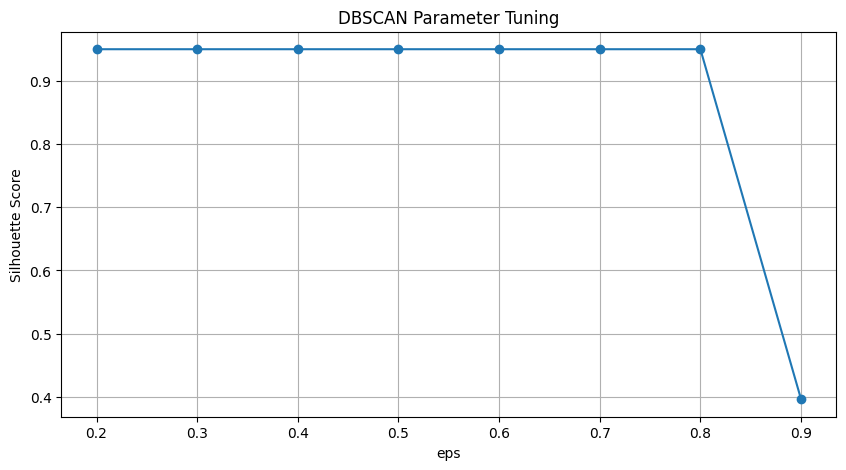

In [ ]:
#DBSCAN Clustering
# DBSCAN parameter scan to find good eps values
eps_values = np.arange(0.2, 2.0, 0.1)
results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(pca_components)

    # Skip if DBSCAN found only noise or 1 cluster
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters <= 1:
        results.append(np.nan)
        continue

    score = silhouette_score(pca_components, labels)
    results.append(score)

plt.figure(figsize=(10,5))
plt.plot(eps_values, results, marker='o')
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.title("DBSCAN Parameter Tuning")
plt.grid()
plt.show()


In [ ]:
# K-Means Clustering
X=df[numeric_feature]
kmeans = KMeans(n_clusters=17, random_state=42)
df['db_cluster']=kmeans.fit_predict(X)


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:14

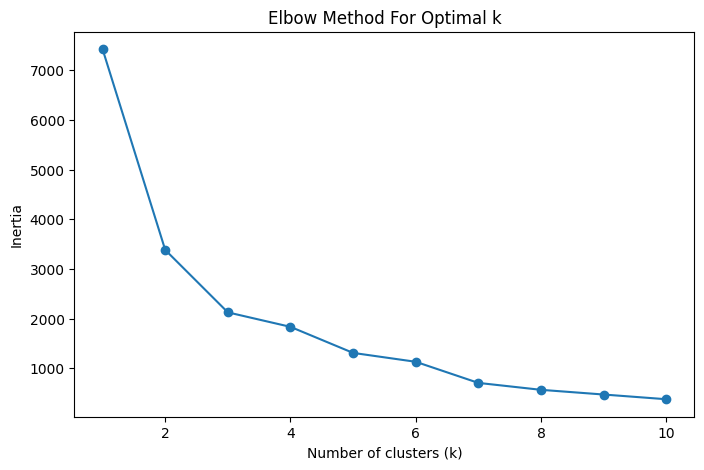

In [ ]:
#Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_components)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_components)
    score = silhouette_score(pca_components, cluster_labels)
    silhouette_scores.append(score)
print(silhouette_scores)



c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:14

[0.5551229158697467, 0.5171579678472873, 0.49959098536374863, 0.5185970833790803, 0.5371327446922384, 0.6097666861932767, 0.6441421463894721, 0.6818682970040352, 0.7343310779656772, 0.7577002944539165, 0.7647544708339175, 0.8004620573954332, 0.8548688648338885, 0.8754144886628706, 0.8866386288488127, 0.9003949826596167, 0.9072122157524317, 0.9152479021557668]


In [ ]:
# K-Means Clustering
X=df[numeric_feature]
kmeans = KMeans(n_clusters=17, random_state=42)
df['cluster']=kmeans.fit_predict(X)




c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


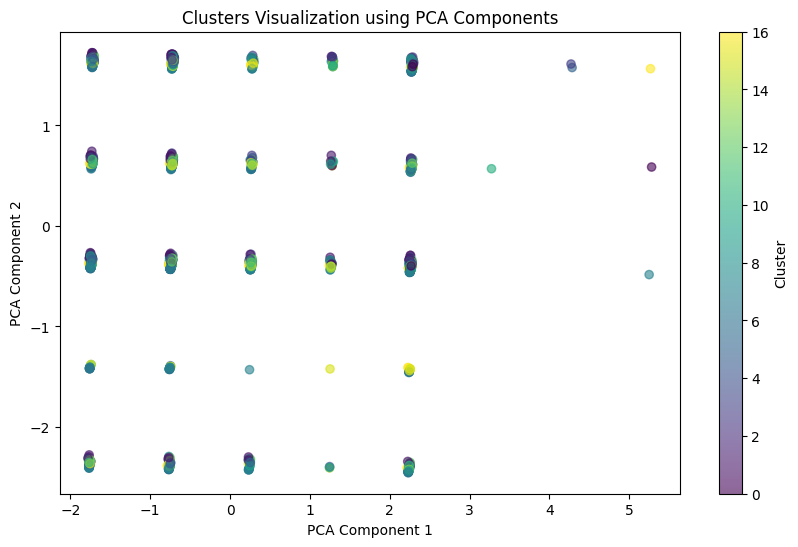

In [ ]:
#visualization of clusters using first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['db_cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization using PCA Components')
plt.colorbar(label='Cluster')
plt.show()

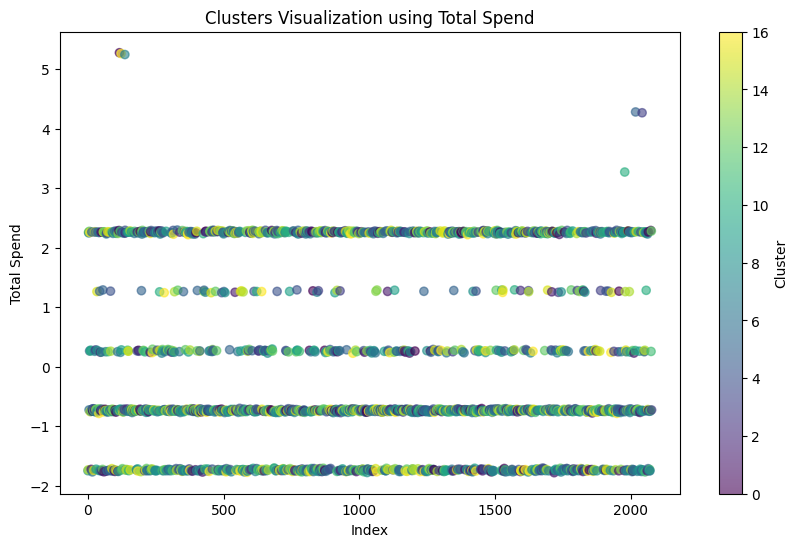

In [ ]:
#visualization of clusters
plt.figure(figsize=(10, 6))
# plot index vs total_spend (use a single numeric column, not the whole numeric_feature list)
plt.scatter(df.index, pca_components[:, 0], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Total Spend')
plt.title('Clusters Visualization using Total Spend')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
X_fetuer=df[numeric_feature + cat_feature]
y_fetuer=df['db_cluster']
X_train, X_test, y_train, y_test = train_test_split(X_fetuer, y_fetuer, test_size=0.2, random_state=42, stratify=y_fetuer)


In [ ]:
Rmodel=RandomForestClassifier(n_estimators=200, random_state=42)
Rmodel.fit(X_train, y_train)
y_pred = Rmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.84      0.89      0.86        18
           2       1.00      1.00      1.00        11
           3       0.92      0.92      0.92        13
           4       0.94      0.91      0.93        34
           5       0.89      0.97      0.93        34
           6       1.00      0.93      0.96        42
           7       0.98      1.00      0.99        44
           8       0.79      0.73      0.76        15
           9       0.97      1.00      0.98        29
          10       1.00      0.74      0.85        19
          11       0.95      0.90      0.92        20
          12       0.93      1.00      0.97        28
          13       0.90      0.95      0.93        20
          14       1.00      0.93      0.96        27
          15       0.97      1.00      0.98        28
          16       1.00      1.00      1.00        17

    accuracy              

In [ ]:
from sklearn.linear_model import LogisticRegression


Lmodel=LogisticRegression(max_iter=200,random_state=42)
Lmodel.fit(X_train, y_train)
y_pred = Lmodel.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[15  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 12  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 31  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0 41  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 43  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0 25  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.88   

c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

scores=[]
for depth in [1,2,3,4,5,6,7]:
  for s in [3,4,5,6,7,8,9,10]:
    TModel=DecisionTreeClassifier(max_depth=depth,min_samples_leaf=s)
    TModel.fit(X_train,y_train)
    Acc=accuracy_score(y_test,TModel.predict(X_test))
    scores.append((depth,s,Acc))
print(scores)

[(1, 3, 0.1875), (1, 4, 0.1875), (1, 5, 0.1875), (1, 6, 0.1875), (1, 7, 0.1875), (1, 8, 0.1875), (1, 9, 0.1875), (1, 10, 0.1875), (2, 3, 0.3269230769230769), (2, 4, 0.3269230769230769), (2, 5, 0.3269230769230769), (2, 6, 0.3269230769230769), (2, 7, 0.3269230769230769), (2, 8, 0.3269230769230769), (2, 9, 0.3269230769230769), (2, 10, 0.3269230769230769), (3, 3, 0.5456730769230769), (3, 4, 0.5456730769230769), (3, 5, 0.5456730769230769), (3, 6, 0.5456730769230769), (3, 7, 0.5456730769230769), (3, 8, 0.5456730769230769), (3, 9, 0.5456730769230769), (3, 10, 0.5456730769230769), (4, 3, 0.7692307692307693), (4, 4, 0.7692307692307693), (4, 5, 0.7692307692307693), (4, 6, 0.7692307692307693), (4, 7, 0.7692307692307693), (4, 8, 0.7692307692307693), (4, 9, 0.7692307692307693), (4, 10, 0.7692307692307693), (5, 3, 0.8221153846153846), (5, 4, 0.8221153846153846), (5, 5, 0.8197115384615384), (5, 6, 0.8197115384615384), (5, 7, 0.8149038461538461), (5, 8, 0.8149038461538461), (5, 9, 0.8125), (5, 10, 0.8

In [ ]:

DT_model=DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=4,splitter='best')
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score for DecisionTreeClassifier : ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  2  0  0  0  0  0  1  0  1  0  1  0  0]
 [ 0 15  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0 11  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 1  0  3  0 25  2  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  0  2  0  0  4  0]
 [ 0  0  0  0  0  0 38  1  0  0  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0 10  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  2  0  0]
 [ 0  0  0  0  1  1  0  0  0  0 12  1  1  3  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  5 13  0  1  0  0  0]
 [ 0  0  0  0  2  2  0  0  0  0  1  0 23  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1  0 18  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 16]]
accuracy_score for DecisionTreeClassifier :  0.8461538461538461
              pre

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[13  0  0  0  0  0  0  0  0  1  1  0  1  0  1  0  0]
 [ 0 12  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  1  1  0  4  0  0  0]
 [ 0  0  0 12  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  1  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  1 32  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 40  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 41  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  3 15  0  1  0  0  0]
 [ 0  0  0  0  1  2  0  0  0  0  2  0 23  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 26  0  0]
 [ 0  0  0  0  1  2  0  1  0  0  0  0  0  0  0 24  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.93   

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', Lmodel), ('dt', DT_model), ('nb', Rmodel),('svm', svm_model)],
    voting='hard',
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[16  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 32  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0 41  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 43  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  1  0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0 15  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  2  0  0  0  0 24  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.89   